In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standard plotly imports
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
# Using plotly + cufflinks in offline mode
from plotly import tools

from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# define path & global variables
FILE_PATH       = '/content/drive/My Drive/Bike sharing' 
HOUR_DF_NAME    = 'hour.csv'
DAY_DATA_NAME   = 'day.csv' 

In [4]:
# Read the dataset
df_hour = pd.read_csv(FILE_PATH + '/' + HOUR_DF_NAME) 
df_day  = pd.read_csv(FILE_PATH + '/' + DAY_DATA_NAME) 

# Print the shape
print('Hourly data shape :', df_hour.shape),
print('Daily data shape :', df_day.shape)

Hourly data shape : (17379, 17)
Daily data shape : (731, 16)


#1 Understand about the data !!!

In [ ]:
# print first five rows of hour data Frame
df_hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# print first five rows of day data Frame
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
print(df_hour.dtypes)
print()
print(df_day.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [ ]:
# check for any NAN values in the dataset

print('Hourly_data NaN Values :', df_hour.isnull().sum().sum())
print('Daily_data NaN Values :', df_day.isnull().sum().sum())

Hourly_data NaN Values : 0
Daily_data NaN Values : 0


In [ ]:
# check whether starts & end data is same for both df
print('""""""""""""')
print('Both df have same start dates :', df_hour.iloc[0]['dteday'] == df_day.iloc[0]['dteday'])
print('Both df have same end dates :',df_hour.iloc[-1]['dteday'] == df_day.iloc[-1]['dteday'])
print('""""""""""""')

print()
print('""""""""""""')
# check how days the data recoreded for df_hour & df_day
start_date_hour = datetime.strptime(df_hour.iloc[0]['dteday'], "%Y-%m-%d")
end_date_hour   = datetime.strptime(df_hour.iloc[-1]['dteday'], "%Y-%m-%d")
print('How many days of data in b/w df_hour:',  end_date_hour - start_date_hour)


start_date_day = datetime.strptime(df_day.iloc[0]['dteday'], "%Y-%m-%d")
end_date_day   = datetime.strptime(df_day.iloc[-1]['dteday'], "%Y-%m-%d")
print('How many days of data in b/w df_day:',  end_date_day - start_date_day)
print('""""""""""""')
print()

print('""""""""""""')
print('How many years of data present in both df :', df_day.yr.unique().shape[0] , ' years')
print('""""""""""""')

print()

print('""""""""""""')
print('How many season present in both df :', df_day.season.unique().shape[0] , ' seasons')
print('""""""""""""')

print()

print('""""""""""""')
print('How many holidays available in 2 years :', df_day.holiday.sum() , ' days')
print('How many holidays available in 1st year :', df_day.groupby('yr')['holiday'].sum()[0] , ' days')
print('How many holidays available in 2nd year :', df_day.groupby('yr')['holiday'].sum()[1] , ' days')
print('""""""""""""')


print()
print('""""""""""""')
print('How many working day available in 2 years :', df_day.workingday.sum() , ' days')
print('How many working day available in 1st year :', df_day.groupby('yr')['workingday'].sum()[0] , ' days')
print('How many working day available in 2ndt year :', df_day.groupby('yr')['workingday'].sum()[1] , ' days')
print()
print('How many non working day available in 2 years including holidays:', df_day[df_day.workingday==0].shape[0] , ' days')
print('How many non working day available in 1st year years including holidays:', df_day[(df_day.workingday==0) & (df_day.yr==0)].shape[0] , ' days')
print('How many non working day available in 2nd year years including holidays:', df_day[(df_day.workingday==0) & (df_day.yr==1)].shape[0] , ' days')
print('""""""""""""')
print()

print('""""""""""""')
print('How many unique weather situation present in df_day :', df_day.weathersit.unique().shape[0] , ' weather situation')
print('How many unique weather situation present in df_hour :', df_hour.weathersit.unique().shape[0] , ' weather situation')

print('""""""""""""')

print()

print('""""""""""""')
#check whether all days have 24 hours of data
days_24_hours = df_day.shape[0]*24 == df_hour.shape[0]
print('Whether all days have 24 hours of data :', days_24_hours)
if days_24_hours == False:
    dates_wo_24_hr_data = {}
    for i, df in df_hour.groupby('dteday'):
        if df.shape[0] != 24:
            dates_wo_24_hr_data[i] = df.shape[0]
    print(str(len(dates_wo_24_hr_data)), 'days in df_hour, where hourly data is less than 24')
    #print('Missing 24 hour data in dates are \n', dates_wo_24_hr_data)
print('""""""""""""')


""""""""""""
Both df have same start dates : True
Both df have same end dates : True
""""""""""""

""""""""""""
How many days of data in b/w df_hour: 730 days, 0:00:00
How many days of data in b/w df_day: 730 days, 0:00:00
""""""""""""

""""""""""""
How many years of data present in both df : 2  years
""""""""""""

""""""""""""
How many season present in both df : 4  seasons
""""""""""""

""""""""""""
How many holidays available in 2 years : 21  days
How many holidays available in 1st year : 10  days
How many holidays available in 2nd year : 11  days
""""""""""""

""""""""""""
How many working day available in 2 years : 500  days
How many working day available in 1st year : 250  days
How many working day available in 2ndt year : 250  days

How many non working day available in 2 years including holidays: 231  days
How many non working day available in 1st year years including holidays: 115  days
How many non working day available in 2nd year years including holidays: 116  days
""""""""

In [ ]:
#check whether all days have 24 hours of data
days_24_hours = df_day.shape[0]*24 == df_hour.shape[0]
print('Whether all days have 24 hours of data :', days_24_hours)
if days_24_hours == False:
    dates_wo_24_hr_data = {}
    for i, df in df_hour.groupby('dteday'):
        if df.shape[0] != 24:
            dates_wo_24_hr_data[i] = df.shape[0]
    print(str(len(dates_wo_24_hr_data)), 'days in df_hour, where hourly data is less than 24')
    #print('Missing 24 hour data in dates are \n', dates_wo_24_hr_data)
print('""""""""""""')

In [ ]:
df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
test = np.array(df_day['holiday'])
test = test.reshape((len(test), 1))


test1 = np.array(df_day['workingday'])
test1 = test1.reshape((len(test1), 1))


final = np.hstack((test, test1))
final[:5,:]

array([[0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1]])

In [5]:

df1 = df_day.copy()
# add columnfor eather sit
df_hour['weather_condition'] = df_hour['weathersit'].map({1 : 'clear_few_cloud',
                                                          2 : 'mist_cloudy_BrokenClouds',
                                                          3 : 'LightSnow_LightRain_ScatterClouds',
                                                          4 : 'HeavyRain_IcePallets_Snow_fog'})

df_day['weather_condition'] = df_day['weathersit'].map({1 : 'clear_few_cloud',
                                                        2 : 'mist_cloudy_BrokenClouds',
                                                        3 : 'LightSnow_LightRain_ScatterClouds'})

df_hour['season_name']       = df_hour['season'].map({1 : 'winter', 
                                                    2 : 'spring', 
                                                    3 : 'summer',  
                                                    4 : 'fall'})

df_day['season_name']       = df_day['season'].map({1 : 'winter', 
                                                    2 : 'spring', 
                                                    3 : 'summer',  
                                                    4 : 'fall'})

df_hour['working_day_str'] =  df_hour['workingday'].map({0 : 'Not_working_day', 
                                                       1 : 'Working_day'})

df_day['working_day_str'] =  df_day['workingday'].map({0 : 'Not_working_day', 
                                                       1 : 'Working_day'})




#
df_day['weekday_str'] =  df_day['weekday'].map({0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'})
df_hour['weekday_str'] =  df_hour['weekday'].map({0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'})

#
df_day['yr_str'] =  df_day['yr'].map({0 : 'year_2011', 1 : 'year_2012'})
df_hour['yr_str'] =  df_hour['yr'].map({0 : 'year_2011', 1 : 'year_2012'})

#
month = {1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec' }
df_day['mnth_str'] =  df_day['mnth'].map(month)
df_hour['mnth_str'] =  df_hour['mnth'].map(month)

#
df_day['temp_original']      = df_day['temp'].apply(lambda x : (x * 47) - 8)
df_day['atemp_original']     = df_day['atemp'].apply(lambda x : (x * 66) - 16)
df_day['hum_original']       = df_day['hum'].apply(lambda x : x * 100)
df_day['windspeed_original'] = df_day['windspeed'].apply(lambda x : x * 67)


#2 Compare two DF (Hour & Day) in terms of casual, registered and Total Users

In [ ]:
#@title Hour Vs Day (Casual Users)
# make a series to plot weaher Vs Casual Vs registered Vs All users
hr_casual = df_hour.groupby(['weather_condition'])['casual'].agg('sum')
dy_casual = df_day.groupby(['weather_condition'])['casual'].agg('sum')

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = hr_casual.index, y = hr_casual.values, text = hr_casual.values, textposition = 'outside', marker_color='red', 
                 showlegend=False)
trace_2 = go.Bar(x = dy_casual.index, y = dy_casual.values, text = dy_casual.values,  textposition = 'outside', marker_color='green', 
                 showlegend=False)

fig = make_subplots(rows=1, cols=2, subplot_titles = ['df_hour Vs Casual', 'df_day Vs Casual']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)

fig.update_xaxes(type="category")


fig['layout'].update(height=600, width=1000)
fig.show()


In [ ]:
#@title  Hour Vs Day (Registered Users)
# make a series to plot weaher Vs Casual Vs registered Vs All users
hr_registered = df_hour.groupby(['weather_condition'])['registered'].agg('sum')
dy_registered = df_day.groupby(['weather_condition'])['registered'].agg('sum')

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = hr_registered.index, y = hr_registered.values, text = hr_registered.values, textposition = 'outside', marker_color='red', 
                 showlegend=False)
trace_2 = go.Bar(x = dy_registered.index, y = dy_registered.values, text = dy_registered.values,  textposition = 'outside', marker_color='green', 
                 showlegend=False)

fig = make_subplots(rows=1, cols=2, subplot_titles = ['df_hour Vs Registered', 'df_day Vs Registered']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)

fig.update_xaxes(type="category")


fig['layout'].update(height=600, width=1000)
fig.show()


In [ ]:
#@title  Hour Vs Day (Overall Users)
# make a series to plot weaher Vs Casual Vs registered Vs All users
hr_cnt = df_hour.groupby(['weather_condition'])['cnt'].agg('sum')
dy_cnt = df_day.groupby(['weather_condition'])['cnt'].agg('sum')

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = hr_cnt.index, y = hr_cnt.values, text = hr_cnt.values, textposition = 'outside', marker_color='red', 
                 showlegend=False)
trace_2 = go.Bar(x = dy_cnt.index, y = dy_cnt.values, text = dy_cnt.values,  textposition = 'outside', marker_color='green', 
                 showlegend=False)

fig = make_subplots(rows=1, cols=2, subplot_titles = ['df_hour Vs Cnt', 'df_day Vs Cnt']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)

fig.update_xaxes(type="category")


fig['layout'].update(height=600, width=1000)
fig.show()


The above three graphs doesn't give much information.
- Lets switch the analysis to only one df (i.e df_day)
- Compare the values between years (i.e 2011 Vs 2012)


In [ ]:
#@title Year Wise split up
# only day df
dy_yr_casual = df_day.groupby(['yr_str'])['casual'].agg('sum').reset_index()
dy_yr_registered = df_day.groupby(['yr_str'])['registered'].agg('sum').reset_index()
dy_yr_cnt = df_day.groupby(['yr_str'])['cnt'].agg('sum').reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = dy_yr_casual.yr_str, y = dy_yr_casual.casual, text = dy_yr_casual.casual, textposition = 'outside', marker_color='red',  showlegend=False)
trace_2 = go.Bar(x = dy_yr_registered.yr_str, y = dy_yr_registered.registered, text = dy_yr_registered.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_3 = go.Bar(x = dy_yr_cnt.yr_str, y = dy_yr_cnt.cnt, text = dy_yr_cnt.cnt,  textposition = 'outside', marker_color='blue', showlegend=False)

fig = make_subplots(rows=1, cols=3, subplot_titles = ['Casual Users', 'Registered users', 'Overall_count']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)

fig.update_xaxes(type="category")


fig['layout'].update(height=600, width=1400)
fig.show()

Observation for above graph :

1. No of Users increased in Year 2012, for both category Users.
2. casual 50 % increases, registered users 68 % increased & overall 65 % increased
2. Want to find out, why in 2012 te users count increased ?????

In [ ]:
#@title  Analyze Year wise weather situation w.r.t no of days [Doesn't seem to have much difference b/w 2011 & 2012]
# make a series to plot weaher Vs Casual Vs registered Vs All users
weathersit_2011 = df_day[df_day.yr_str == 'year_2011']['weather_condition'].value_counts().reset_index()
weathersit_2012 = df_day[df_day.yr_str == 'year_2012']['weather_condition'].value_counts().reset_index()

weathersit_2011.columns = ['weathersit', 'No_of_days']
weathersit_2012.columns = ['weathersit', 'No_of_days']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = weathersit_2011.weathersit, y = weathersit_2011.No_of_days, text = weathersit_2011.No_of_days, textposition = 'outside', marker_color='red', showlegend=False)
trace_2 = go.Bar(x = weathersit_2012.weathersit, y = weathersit_2012.No_of_days, text = weathersit_2012.No_of_days,  textposition = 'outside', marker_color='green', showlegend=False)

fig = make_subplots(rows=1, cols=2, subplot_titles = ['weathersit_2011', 'weathersit_2012']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)

fig.update_xaxes(type="category")


fig['layout'].update(height=600, width=1000)
fig.show()



In [ ]:
#@title  Analyze Year wise weather situation w.r.t Users (Casual, registered, Overall_cnt)

dy_SeasonSit_casual_2011     =   df_day[df_day.yr_str == 'year_2011'].groupby(['weather_condition'])['casual'].agg('sum').reset_index()
dy_SeasonSit_registerd_2011  =   df_day[df_day.yr_str == 'year_2011'].groupby(['weather_condition'])['registered'].agg('sum').reset_index()
dy_SeasonSit_cnt_2011        =   df_day[df_day.yr_str == 'year_2011'].groupby(['weather_condition'])['cnt'].agg('sum').reset_index()


dy_SeasonSit_casual_2012     =   df_day[df_day.yr_str == 'year_2012'].groupby(['weather_condition'])['casual'].agg('sum').reset_index()
dy_SeasonSit_registerd_2012  =   df_day[df_day.yr_str == 'year_2012'].groupby(['weather_condition'])['registered'].agg('sum').reset_index()
dy_SeasonSit_cnt_2012        =   df_day[df_day.yr_str == 'year_2012'].groupby(['weather_condition'])['cnt'].agg('sum').reset_index()


fig = make_subplots(rows=2, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}],
                                           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])

trace_1 = go.Bar(x = dy_SeasonSit_casual_2011.weather_condition,     y = dy_SeasonSit_casual_2011.casual,         text = dy_SeasonSit_casual_2011.casual,         textposition = 'outside', marker_color='red',  showlegend=False)
trace_2 = go.Bar(x = dy_SeasonSit_registerd_2011.weather_condition,  y = dy_SeasonSit_registerd_2011.registered,  text = dy_SeasonSit_registerd_2011.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_3 = go.Bar(x = dy_SeasonSit_cnt_2011.weather_condition,        y = dy_SeasonSit_cnt_2011.cnt,               text = dy_SeasonSit_cnt_2011.cnt,               textposition = 'outside', marker_color='blue', showlegend=False)
trace_4 = go.Bar(x = dy_SeasonSit_casual_2012.weather_condition,     y = dy_SeasonSit_casual_2012.casual,         text = dy_SeasonSit_casual_2012.casual,         textposition = 'outside', marker_color='red',  showlegend=False)
trace_5 = go.Bar(x = dy_SeasonSit_registerd_2012.weather_condition,  y = dy_SeasonSit_registerd_2012.registered,  text = dy_SeasonSit_registerd_2012.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_6 = go.Bar(x = dy_SeasonSit_cnt_2012.weather_condition,        y = dy_SeasonSit_cnt_2012.cnt,               text = dy_SeasonSit_cnt_2012.cnt,               textposition = 'outside', marker_color='blue', showlegend=False)

fig = make_subplots(rows=2, cols=3, subplot_titles = ['Casual_2011', 'Registered_2011', 'Overall_2011', 'Casual_2012', 'Registered_2012', 'Overall_2012']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)
fig.append_trace(trace_4, 2, 1)
fig.append_trace(trace_5, 2, 2)
fig.append_trace(trace_6, 2, 3)

fig.update_xaxes(type="category")

fig['layout'].update(height=1100, width=1400)
fig.show()



Observation for above graph :
1. No of Users increased in Year 2012, for both category Users (casual & registered)
2. Specifically, in Light_Snow_LightRain_ScatterClouds we can see in 2012, no of users reduced in both categories.
3. Except that, in all other season_situation the count increased in 2012

In [ ]:
#@title  Analyze Year wise season w.r.t Users (Casual, registered, Overall_cnt)

dy_season_casual_2011     =   df_day[df_day.yr_str == 'year_2011'].groupby(['season_name'])['casual'].agg('sum').reset_index()
dy_season_registerd_2011  =   df_day[df_day.yr_str == 'year_2011'].groupby(['season_name'])['registered'].agg('sum').reset_index()
dy_season_cnt_2011        =   df_day[df_day.yr_str == 'year_2011'].groupby(['season_name'])['cnt'].agg('sum').reset_index()


dy_season_casual_2012     =   df_day[df_day.yr_str == 'year_2012'].groupby(['season_name'])['casual'].agg('sum').reset_index()
dy_season_registerd_2012  =   df_day[df_day.yr_str == 'year_2012'].groupby(['season_name'])['registered'].agg('sum').reset_index()
dy_season_cnt_2012        =   df_day[df_day.yr_str == 'year_2012'].groupby(['season_name'])['cnt'].agg('sum').reset_index()


fig = make_subplots(rows=2, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}],
                                           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])

trace_1 = go.Bar(x = dy_season_casual_2011.season_name,        y = dy_season_casual_2011.casual,            text = dy_season_casual_2011.casual,         textposition = 'outside', marker_color='red',  showlegend=False)
trace_2 = go.Bar(x = dy_season_registerd_2011.season_name,     y = dy_season_registerd_2011.registered,     text = dy_season_registerd_2011.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_3 = go.Bar(x = dy_season_cnt_2011.season_name,           y = dy_season_cnt_2011.cnt,                  text = dy_season_cnt_2011.cnt,               textposition = 'outside', marker_color='blue', showlegend=False)
trace_4 = go.Bar(x = dy_season_casual_2012.season_name,        y = dy_season_casual_2012.casual,            text = dy_season_casual_2012.casual,         textposition = 'outside', marker_color='red',  showlegend=False)
trace_5 = go.Bar(x = dy_season_registerd_2012.season_name,     y = dy_season_registerd_2012.registered,     text = dy_season_registerd_2012.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_6 = go.Bar(x = dy_season_cnt_2012.season_name,           y = dy_season_cnt_2012.cnt,                  text = dy_season_cnt_2012.cnt,               textposition = 'outside', marker_color='blue', showlegend=False)

fig = make_subplots(rows=2, cols=3, subplot_titles = ['Casual_2011', 'Registered_2011', 'Overall_2011', 'Casual_2012', 'Registered_2012', 'Overall_2012']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)
fig.append_trace(trace_4, 2, 1)
fig.append_trace(trace_5, 2, 2)
fig.append_trace(trace_6, 2, 3)

fig.update_xaxes(type="category")

fig['layout'].update(height=1100, width=1400)
fig.show()


In [ ]:
#@title Analyze Season Usages w.r.t to Users for both Years
# only day df
dy_season_casual = df_day.groupby(['season_name'])['casual'].agg('sum').reset_index()
dy_season_registered = df_day.groupby(['season_name'])['registered'].agg('sum').reset_index()
dy_season_cnt = df_day.groupby(['season_name'])['cnt'].agg('sum').reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = dy_season_casual.season_name, y = dy_season_casual.casual, text = dy_season_casual.casual, textposition = 'outside', marker_color='red',  showlegend=False)
trace_2 = go.Bar(x = dy_season_registered.season_name, y = dy_season_registered.registered, text = dy_season_registered.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_3 = go.Bar(x = dy_season_cnt.season_name, y = dy_season_cnt.cnt, text = dy_season_cnt.cnt,  textposition = 'outside', marker_color='blue', showlegend=False)

fig = make_subplots(rows=1, cols=3, subplot_titles = ['Casual Users', 'Registered users', 'Overall_count']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)

fig.update_xaxes(type="category")


fig['layout'].update(height=600, width=1400)
fig.show()

Observation for above graph 

1. When we compare 2011 & 2012 data, qty of users, or the pattern is almost same
2. In both years, Summer season has maximum users for both Casual & registered Users
3. Then comes Spring season, fall & Winter
4. Registered users : Fall & Spring have almost have equal values for both 2011 & 2012
5. In Casual users it is different. 
Specifically, in Light_Snow_LightRain_ScatterClouds we can see in 2012, no of users reduced in both categories.
Except that, in all other season_situation the count increased in 2012

In [ ]:
#@title Analyze Season Vs Months in respective year 
df_2011 = pd.DataFrame([i for i, df in df_day[df_day.yr_str == 'year_2011'].groupby(['season_name', 'mnth'])], columns = ['season', 'month'])
df_2012 = pd.DataFrame([i for i, df in df_day[df_day.yr_str == 'year_2012'].groupby(['season_name', 'mnth'])], columns = ['season', 'month'])

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Scatter(x = df_2011.season, y = df_2011.month, mode='markers',  marker=dict(size= 15, color = ('red')), showlegend=False)
trace_2 = go.Scatter(x = df_2012.season, y = df_2012.month, mode='markers', marker=dict(size= 15, color = ('blue')), showlegend=False)

fig = make_subplots(rows=1, cols=3, subplot_titles = ['Year_2011 ', 'Year_2012']) 
fig.update_traces(marker=dict(size=12, line=dict(width=2,  color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)


fig.update_xaxes(type="category")
fig.update_yaxes(type="category")


fig['layout'].update(height=600, width=1600)
fig.show()

Observation for above graph

1. To understand, at which months the season took place. So I plotted season Vs Months.
2. For both year, the season occurring month is same. 

In [ ]:
#@title  Analyze Year wise working days w.r.t Users (Casual, registered, Overall_cnt)

dy_wkdays_casual_2011     =   df_day[df_day.yr_str == 'year_2011'].groupby(['working_day_str'])['casual'].agg('sum').reset_index()
dy_wkdays_registered_2011 =   df_day[df_day.yr_str == 'year_2011'].groupby(['working_day_str'])['registered'].agg('sum').reset_index()
dy_wkdays_cnt_2011        =   df_day[df_day.yr_str == 'year_2011'].groupby(['working_day_str'])['cnt'].agg('sum').reset_index()


dy_wkdays_casual_2012     =   df_day[df_day.yr_str == 'year_2012'].groupby(['working_day_str'])['casual'].agg('sum').reset_index()
dy_wkdays_registered_2012  =   df_day[df_day.yr_str == 'year_2012'].groupby(['working_day_str'])['registered'].agg('sum').reset_index()
dy_wkdays_cnt_2012        =   df_day[df_day.yr_str == 'year_2012'].groupby(['working_day_str'])['cnt'].agg('sum').reset_index()


fig = make_subplots(rows=2, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}],
                                           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])

trace_1 = go.Bar(x = dy_wkdays_casual_2011.working_day_str,        y = dy_wkdays_casual_2011.casual,            text = dy_wkdays_casual_2011.casual,         textposition = 'outside', marker_color='red',  showlegend=False)
trace_2 = go.Bar(x = dy_wkdays_registered_2011.working_day_str,    y = dy_wkdays_registered_2011.registered,    text = dy_wkdays_registered_2011.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_3 = go.Bar(x = dy_wkdays_cnt_2011.working_day_str,           y = dy_wkdays_cnt_2011.cnt,                  text = dy_wkdays_cnt_2011.cnt,               textposition = 'outside', marker_color='blue', showlegend=False)
trace_4 = go.Bar(x = dy_wkdays_casual_2012.working_day_str,        y = dy_wkdays_casual_2012.casual,            text = dy_wkdays_casual_2012.casual,         textposition = 'outside', marker_color='red',  showlegend=False)
trace_5 = go.Bar(x = dy_wkdays_registered_2012.working_day_str,    y = dy_wkdays_registered_2012.registered,    text = dy_wkdays_registered_2012.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_6 = go.Bar(x = dy_wkdays_cnt_2012.working_day_str,           y = dy_wkdays_cnt_2012.cnt,                  text = dy_wkdays_cnt_2012.cnt,               textposition = 'outside', marker_color='blue', showlegend=False)

fig = make_subplots(rows=2, cols=3, subplot_titles = ['Casual_2011', 'Registered_2011', 'Overall_2011', 'Casual_2012', 'Registered_2012', 'Overall_2012']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)
fig.append_trace(trace_4, 2, 1)
fig.append_trace(trace_5, 2, 2)
fig.append_trace(trace_6, 2, 3)

fig.update_xaxes(type="category")

fig['layout'].update(height=1100, width=1400)
fig.show()


In [ ]:
#@title Analyze Working days & Non Working days (For both years)
# only day df
dy_wkday_casual = df_day.groupby(['working_day_str'])['casual'].agg('sum').reset_index()
dy_wkday_registered = df_day.groupby(['working_day_str'])['registered'].agg('sum').reset_index()
dy_wkday_cnt = df_day.groupby(['working_day_str'])['cnt'].agg('sum').reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = dy_wkday_casual.working_day_str, y = dy_wkday_casual.casual, text = dy_wkday_casual.casual, textposition = 'outside', marker_color='red',  showlegend=False)
trace_2 = go.Bar(x = dy_wkday_registered.working_day_str, y = dy_wkday_registered.registered, text = dy_wkday_registered.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_3 = go.Bar(x = dy_wkday_cnt.working_day_str, y = dy_wkday_cnt.cnt, text = dy_wkday_cnt.cnt,  textposition = 'outside', marker_color='blue', showlegend=False)

fig = make_subplots(rows=1, cols=3, subplot_titles = ['Casual Users', 'Registered users', 'Overall_count']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)

fig.update_xaxes(type="category")


fig['layout'].update(height=600, width=1400)
fig.show()

Observation for above graph

1. Working days is for registered Users & Non working days for casual users

In [ ]:
#@title  Analyze week days with Users counts

dy_weekday_casual = df_day.groupby(['weekday_str'])['casual'].agg('sum').reset_index()
dy_weekday_registered = df_day.groupby(['weekday_str'])['registered'].agg('sum').reset_index()
dy_weekday_cnt = df_day.groupby(['weekday_str'])['cnt'].agg('sum').reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = dy_weekday_casual.weekday_str, y = dy_weekday_casual.casual, text = dy_weekday_casual.casual, textposition = 'outside', marker_color='red',  showlegend=False)
trace_2 = go.Bar(x = dy_weekday_registered.weekday_str, y = dy_weekday_registered.registered, text = dy_weekday_registered.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_3 = go.Bar(x = dy_weekday_cnt.weekday_str, y = dy_weekday_cnt.cnt, text = dy_weekday_cnt.cnt,  textposition = 'outside', marker_color='blue', showlegend=False)

fig = make_subplots(rows=1, cols=3, subplot_titles = ['Casual Users', 'Registered users', 'Overall_count']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)

fig.update_xaxes(type="category")


fig['layout'].update(height=600, width=1400)
fig.show()

Observation for above graph

1. Casual Users - Saturday & Sunday has higher counts
2. registerd users - week days has higher counts

In [ ]:
#@title  Analyze hour data with Users counts

dy_hr_casual_2011    = df_hour[df_hour.yr_str == 'year_2011'].groupby(['hr'])['casual'].agg('sum').reset_index()
dy_hr_regitered_2011 = df_hour[df_hour.yr_str == 'year_2011'].groupby(['hr'])['registered'].agg('sum').reset_index()
dy_hr_cnt_2011       = df_hour[df_hour.yr_str == 'year_2011'].groupby(['hr'])['cnt'].agg('sum').reset_index()

dy_hr_casual_2012    = df_hour[df_hour.yr_str == 'year_2012'].groupby(['hr'])['casual'].agg('sum').reset_index()
dy_hr_regitered_2012 = df_hour[df_hour.yr_str == 'year_2012'].groupby(['hr'])['registered'].agg('sum').reset_index()
dy_hr_cnt_2012       = df_hour[df_hour.yr_str == 'year_2012'].groupby(['hr'])['cnt'].agg('sum').reset_index()


fig = go.Figure()
fig.add_trace(go.Scatter(x=dy_hr_casual_2011.hr,     y=dy_hr_casual_2011.casual,          mode='lines+markers', name='Casual'))
fig.add_trace(go.Scatter(x=dy_hr_regitered_2011.hr,  y=dy_hr_regitered_2011.registered,   mode='lines+markers', name='Registered'))
fig.add_trace(go.Scatter(x=dy_hr_cnt_2011.hr,        y=dy_hr_cnt_2011.cnt,                mode='lines+markers', name='Overall_cnt'))
fig.update_xaxes(type="category")
fig.update_layout(title= 'Year 2011 Hr wise count data')
fig.show()


fig = go.Figure()
fig.add_trace(go.Scatter(x=dy_hr_casual_2012.hr,     y=dy_hr_casual_2012.casual,          mode='lines+markers', name='Casual'))
fig.add_trace(go.Scatter(x=dy_hr_regitered_2012.hr,  y=dy_hr_regitered_2012.registered,   mode='lines+markers', name='Registered'))
fig.add_trace(go.Scatter(x=dy_hr_cnt_2012.hr,        y=dy_hr_cnt_2012.cnt,                mode='lines+markers', name='Overall_cnt'))
fig.update_xaxes(type="category")
fig.update_layout(title= 'Year 2012 Hr wise count data')
fig.show()


Observation for above graph

1. For both year (2011 & 2012) number of Registered User count increases @8:00 in morning & 5:00/6:00 in evening 
2. This shows maximum number of office/students goers comes under registered user cnt
3. Casual Users cnt shows a gradual increase from 6:00 in morning

In [ ]:
#@title Box plot represent User Count Information

fig = go.Figure()
fig.add_trace(go.Box(y= df_day.casual,     x=df_day.yr_str, name='Casual_Count', marker_color='#3D9970'))
fig.add_trace(go.Box(y= df_day.registered, x=df_day.yr_str, name='Registered_Count', marker_color='#FF4136'))
fig.add_trace(go.Box(y= df_day.cnt,        x=df_day.yr_str, name='Overall_Count', marker_color='#FF851B'))

fig.update_layout(yaxis_title='Count',title = 'Year Vs Users',boxmode='group')
fig.update_xaxes(type="category")
fig.show()



fig = go.Figure()
fig.add_trace(go.Box(y= df_day.casual,      name='Casual_Count', marker_color='#3D9970'))
fig.add_trace(go.Box(y= df_day.registered,  name='Registered_Count', marker_color='#FF4136'))
fig.add_trace(go.Box(y= df_day.cnt,         name='Overall_Count', marker_color='#FF851B'))

fig.update_layout(yaxis_title='Count (No)',title = 'Year Vs Users',boxmode='group')
fig.update_xaxes(type="category")
fig.show()



Observation for above graph

1. Based on IQR from box plot, Casual Users columns has many outliers.
2. Values ranging b/w 2258 till 3410 are defined as Outliers 
3. around 44 values were defined as outlier points

In [ ]:
#@title Analyze which month has higher Users w.r.t 2 years 
# only day df
dy_yr_casual     = df_day[df_day.yr_str == 'year_2011'].groupby(['mnth'])['casual'].agg('sum').reset_index()
dy_yr_registered = df_day[df_day.yr_str == 'year_2011'].groupby(['mnth'])['registered'].agg('sum').reset_index()
dy_yr_cnt        = df_day[df_day.yr_str == 'year_2011'].groupby(['mnth'])['cnt'].agg('sum').reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = dy_yr_casual.mnth, y = dy_yr_casual.casual, text = dy_yr_casual.casual, textposition = 'outside', marker_color='red',  showlegend=False)
trace_2 = go.Bar(x = dy_yr_registered.mnth, y = dy_yr_registered.registered, text = dy_yr_registered.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_3 = go.Bar(x = dy_yr_cnt.mnth, y = dy_yr_cnt.cnt, text = dy_yr_cnt.cnt,  textposition = 'outside', marker_color='blue', showlegend=False)

fig = make_subplots(rows=1, cols=3, subplot_titles = ['Casual Users', 'Registered users', 'Overall_count']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)

fig.update_xaxes(type="category")
fig.update_layout(title= 'Year 2011 splitUp')

fig['layout'].update(height=600, width=1400)
fig.show()



dy_yr_casual     = df_day[df_day.yr_str == 'year_2012'].groupby(['mnth'])['casual'].agg('sum').reset_index()
dy_yr_registered = df_day[df_day.yr_str == 'year_2012'].groupby(['mnth'])['registered'].agg('sum').reset_index()
dy_yr_cnt        = df_day[df_day.yr_str == 'year_2012'].groupby(['mnth'])['cnt'].agg('sum').reset_index()

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Bar(x = dy_yr_casual.mnth, y = dy_yr_casual.casual, text = dy_yr_casual.casual, textposition = 'outside', marker_color='red',  showlegend=False)
trace_2 = go.Bar(x = dy_yr_registered.mnth, y = dy_yr_registered.registered, text = dy_yr_registered.registered,  textposition = 'outside', marker_color='green', showlegend=False)
trace_3 = go.Bar(x = dy_yr_cnt.mnth, y = dy_yr_cnt.cnt, text = dy_yr_cnt.cnt,  textposition = 'outside', marker_color='blue', showlegend=False)

fig = make_subplots(rows=1, cols=3, subplot_titles = ['Casual Users', 'Registered users', 'Overall_count']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 1, 3)

fig.update_xaxes(type="category")
fig.update_layout(title= 'Year 2012 splitUp')

fig['layout'].update(height=600, width=1400)
fig.show()

Observation for above graph
1. 6,7,8,9 are summer season so it naturally increased
2. In 2012 every month value invreases to some % when compared with 2011 respective month for casual & registerd users
3. In 2012, from spring season getting increased
4. When we look at the value, in 2012, the values was way more than 2011


But 2012, from the 1st month itself it get increases

In [ ]:
#@title Box plot represent climate information
df_2011 = df_day[df_day.yr_str == 'year_2011'].reset_index(drop= True)
df_2012 = df_day[df_day.yr_str == 'year_2012'].reset_index(drop= True)

fig = go.Figure()
fig.add_trace(go.Box(y= df_2011.temp, x=df_2011.season_name, name='Temperature', marker_color='#3D9970'))
fig.add_trace(go.Box(y= df_2011.atemp, x=df_2011.season_name, name='Feel_Temperature', marker_color='#FF4136'))
fig.add_trace(go.Box(y= df_2011.hum, x=df_2011.season_name, name='Humidity', marker_color='#FF851B'))
fig.add_trace(go.Box(y= df_2011.windspeed, x=df_2011.season_name, name='Wind_speed', marker_color='#FF365d'))

fig.update_layout(
    yaxis_title='normalized Values',title = 'Year_2011 Climate',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()


fig = go.Figure()
fig.add_trace(go.Box(y= df_2012.temp, x=df_2012.season_name, name='Temperature', marker_color='#3D9970'))
fig.add_trace(go.Box(y= df_2012.atemp, x=df_2012.season_name, name='Feel_Temperature', marker_color='#FF4136'))
fig.add_trace(go.Box(y= df_2012.hum, x=df_2012.season_name, name='Humidity', marker_color='#FF851B'))
fig.add_trace(go.Box(y= df_2012.windspeed, x=df_2012.season_name, name='Wind_speed', marker_color='#FF365d'))

fig.update_layout(
    yaxis_title='normalized Values',title = 'Year_2012 Climate',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()

In [ ]:
#@title Box plot represent climate information
df_2011 = df_day[df_day.yr_str == 'year_2011'].reset_index(drop= True)
df_2012 = df_day[df_day.yr_str == 'year_2012'].reset_index(drop= True)

fig = go.Figure()
fig.add_trace(go.Box(y= df_2011.temp_original, x=df_2011.season_name, name='2011_Temp', marker_color='#3D9970'))
fig.add_trace(go.Box(y= df_2012.temp_original, x=df_2012.season_name, name='2012_Temp', marker_color='#FF4136'))
fig.update_layout(
    yaxis_title='Temperature Values',title = 'seasons',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(y= df_2011.atemp_original, x=df_2011.season_name, name='2011_Temp', marker_color='#3D9970'))
fig.add_trace(go.Box(y= df_2012.atemp_original, x=df_2012.season_name, name='2012_Temp', marker_color='#FF4136'))
fig.update_layout(
    yaxis_title='Feeling Temperature Values',title = 'seasons',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(y= df_2011.hum_original, x=df_2011.season_name, name='2011_Temp', marker_color='#3D9970'))
fig.add_trace(go.Box(y= df_2012.hum_original, x=df_2012.season_name, name='2012_Temp', marker_color='#FF4136'))
fig.update_layout(
    yaxis_title='Humidity Values',title = 'seasons',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(y= df_2011.windspeed_original, x=df_2011.season_name, name='2011_Temp', marker_color='#3D9970'))
fig.add_trace(go.Box(y= df_2012.windspeed_original, x=df_2012.season_name, name='2012_Temp', marker_color='#FF4136'))
fig.update_layout(
    yaxis_title='windspeed_original',title = 'seasons',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()


In [ ]:
#@title  Analyze Temperature Vs Count


fig = make_subplots(rows=2, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}],
                                           [{"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Scatter(x = df_day.temp, y = df_day.cnt, mode= 'markers',  showlegend=False)
trace_2 = go.Scatter(x = df_day.temp_original, y = df_day.cnt, mode= 'markers', showlegend=False)
trace_3 = go.Scatter(x = df_day.atemp, y = df_day.cnt, mode= 'markers',  showlegend=False)
trace_4 = go.Scatter(x = df_day.atemp_original, y = df_day.cnt, mode= 'markers',  showlegend=False)

fig = make_subplots(rows=2, cols=2, subplot_titles = ['Normalized_Temp', 'Temp', 'Normalized_Feel_Temp','Feel_Temp' ]) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 2, 1)
fig.append_trace(trace_4, 2, 2)



fig['layout'].update(height=1000, width=1400)
fig.show()


In [7]:
#@title  Analyze Temperature Vs Count


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
trace_1 = go.Scatter(x = df_day.hum, y = df_day.cnt, mode= 'markers',  showlegend=False)
trace_2 = go.Scatter(x = df_day.windspeed, y = df_day.cnt, mode= 'markers',  showlegend=False)

fig = make_subplots(rows=1, cols=2, subplot_titles = ['Normalized_humid',  'Normalized_windspped']) 

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)




fig['layout'].update(height=700, width=1400)
fig.show()


In [8]:
fig = go.Figure(data=go.Scatter(x=df_day.weathersit, y=df_day.cnt, mode='markers'))
fig.show()

In [11]:
df_day[df_day.hum == 0].index

Int64Index([68], dtype='int64')

In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_condition,season_name,working_day_str,weekday_str,yr_str,mnth_str,temp_original,atemp_original,hum_original,windspeed_original
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,mist_cloudy_BrokenClouds,winter,Not_working_day,Saturday,year_2011,Jan,8.175849,7.999250,80.5833,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,mist_cloudy_BrokenClouds,winter,Not_working_day,Sunday,year_2011,Jan,9.083466,7.346774,69.6087,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,clear_few_cloud,winter,Working_day,Monday,year_2011,Jan,1.229108,-3.499270,43.7273,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,clear_few_cloud,winter,Working_day,Tuesday,year_2011,Jan,1.400000,-1.999948,59.0435,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,clear_few_cloud,winter,Working_day,Wednesday,year_2011,Jan,2.666979,-0.868180,43.6957,12.522300


In [ ]:
df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'weather_condition', 'season_name',
       'working_day_str', 'weekday_str', 'yr_str', 'mnth_str', 'temp_original',
       'atemp_original', 'hum_original', 'windspeed_original'],
      dtype='object')

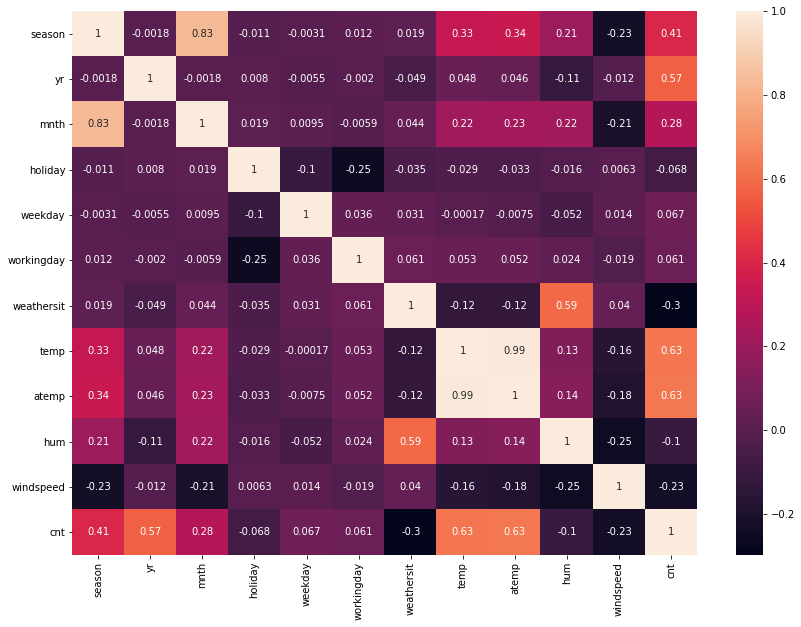

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df_day.loc[:, ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot = True)

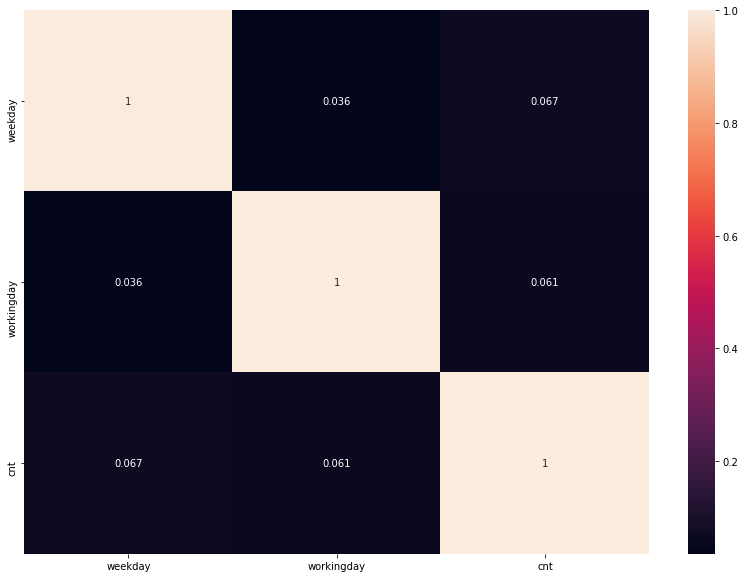

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df_day.loc[:, ['weekday','workingday', 'cnt']].corr(), annot = True)

In [ ]:
df1 = df_day
df1['weekday'] = df1['weekday'].apply(lambda x : 1 if (x ==0) or (x==6) else 0)

In [ ]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,1,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,0,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,0,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


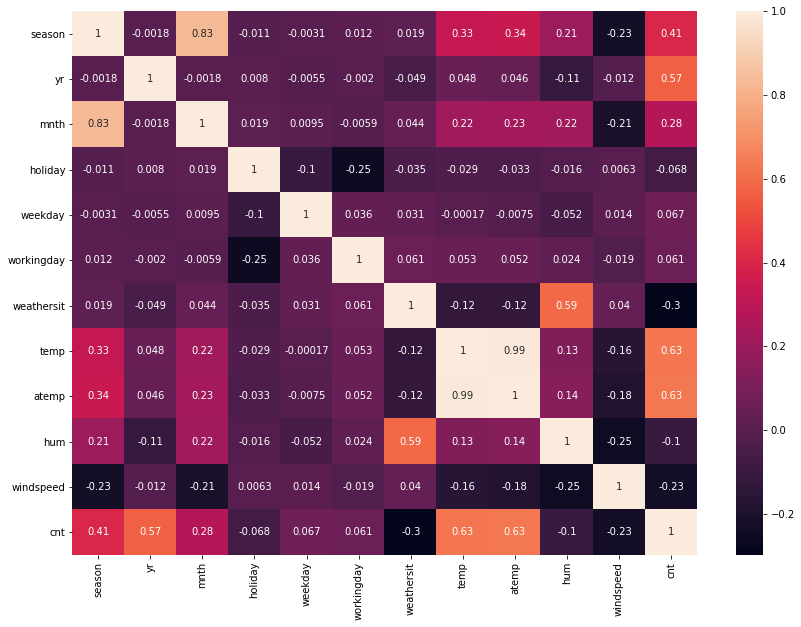

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(df_day.loc[:, ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot = True)

In [ ]:
df1.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [ ]:
print('Week_end :', df1[df1.weekday == 1]['cnt'].mean())
print('Week_days :', df1[df1.weekday == 0]['cnt'].mean())


print('Week_end :', df1[df1.weekday == 1]['cnt'].median())
print('Week_days :', df1[df1.weekday == 0]['cnt'].median())

Week_end : 4389.685714285714
Week_days : 4550.5662188099805
Week_end : 4467.5
Week_days : 4575.0


In [11]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Box(y=df_day.temp, name = 'Temp'))
fig.add_trace(go.Box(y=df_day.atemp, name = 'A-temp'))
fig.add_trace(go.Box(y=df_day.hum, name = 'hum'))
fig.add_trace(go.Box(y=df_day.windspeed, name = 'windspeed'))
fig.show()

In [10]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Box(y=df_day.temp_original, name = 'Temp'))
fig.add_trace(go.Box(y=df_day.temp_original, name = 'A-temp'))
fig.add_trace(go.Box(y=df_day.hum_original, name = 'hum'))
fig.add_trace(go.Box(y=df_day.hum_original, name = 'windspeed'))
fig.show()

In [12]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_day.cnt, name = 'Cnt'))

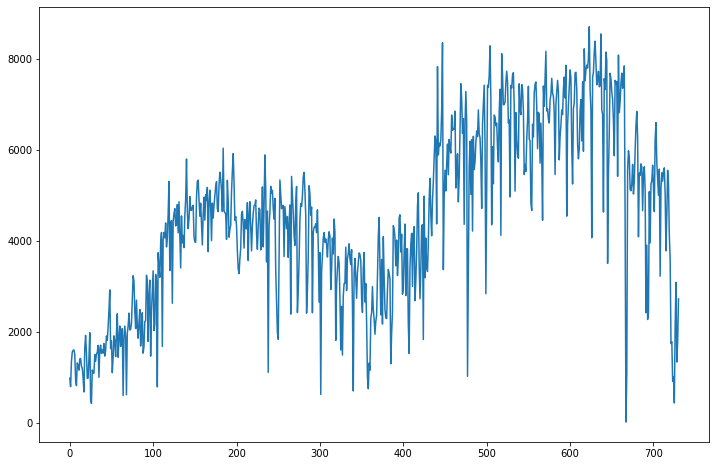

In [13]:
plt.figure(figsize=(12,8))
plt.plot(df_day.cnt)
plt.show()

In [9]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_condition,season_name,working_day_str,weekday_str,yr_str,mnth_str,temp_original,atemp_original,hum_original,windspeed_original
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,mist_cloudy_BrokenClouds,winter,Not_working_day,Saturday,year_2011,Jan,8.175849,7.999250,80.5833,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,mist_cloudy_BrokenClouds,winter,Not_working_day,Sunday,year_2011,Jan,9.083466,7.346774,69.6087,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,clear_few_cloud,winter,Working_day,Monday,year_2011,Jan,1.229108,-3.499270,43.7273,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,clear_few_cloud,winter,Working_day,Tuesday,year_2011,Jan,1.400000,-1.999948,59.0435,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,clear_few_cloud,winter,Working_day,Wednesday,year_2011,Jan,2.666979,-0.868180,43.6957,12.522300


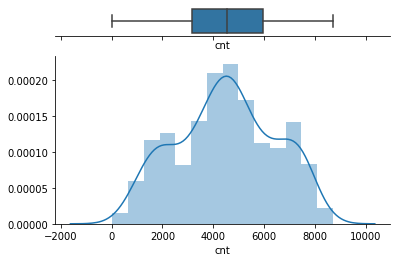

In [5]:
# plt the cnt 

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_day.cnt, ax=ax_box)
sns.distplot(df_day.cnt, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)


In [ ]:
df_day['lg_count'] = np.log

In [17]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import norm, skew


(mu, sigma) = norm.fit(df_day['cnt'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 4504.35 and sigma = 1935.89



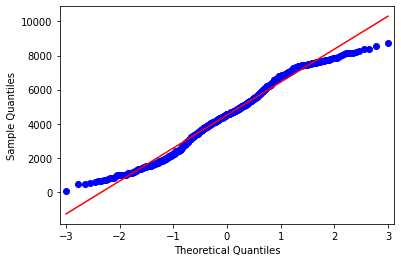

In [22]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df_day.cnt, line='s')
plt.show()

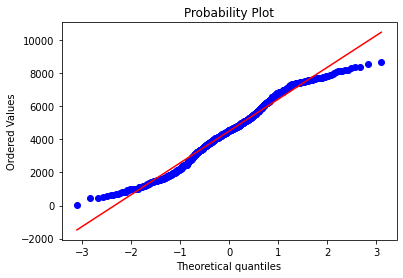

In [18]:
fig = plt.figure()
res = stats.probplot(df_day['cnt'], plot=plt)
plt.show();

In [ ]:
# Avg of cnt
print('Mean :')
print(df_day.cnt.mean())

print()
print('median :')
print(df_day.cnt.median())
print()

print('Std :')
print(df_day.cnt.std())

Mean :
4504.3488372093025

median :
4548.0

Std :
1937.2114516187678


In [ ]:
from sklearn.ensemble import IsolationForest
df = df_day[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']] 
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df)
mask = np.where(yhat == -1)
df_outliers = df.loc[mask]

In [ ]:
# yhat 
df.loc[df[df.cnt < 1000].index]
# df[(df.yr == 1) & (df.mnth == 10)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
17,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,683
21,1,0,1,0,6,0,1,0.059130,0.079070,0.400000,0.171970,981
22,1,0,1,0,0,0,1,0.096522,0.098839,0.436522,0.246600,986
25,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,506
26,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,431
64,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,605


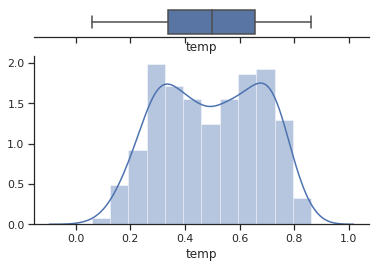

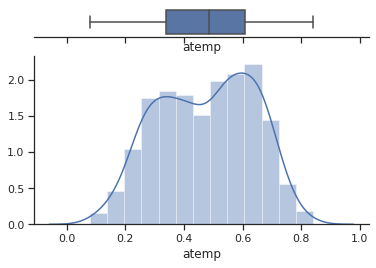

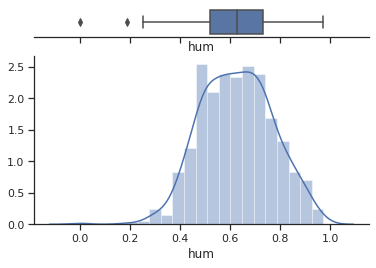

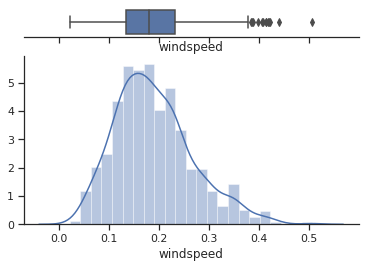

In [ ]:
# sns distplot
sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_day.temp, ax=ax_box)
sns.distplot(df_day.temp, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_day.atemp, ax=ax_box)
sns.distplot(df_day.atemp, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_day.hum, ax=ax_box)
sns.distplot(df_day.hum, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_day.windspeed, ax=ax_box)
sns.distplot(df_day.windspeed, ax=ax_hist)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)


In [ ]:
df_day.season_name.value_counts()

summer    188
spring    184
winter    181
fall      178
Name: season_name, dtype: int64

In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_condition,season_name,working_day_str,weekday_str,yr_str,mnth_str,temp_original,atemp_original,hum_original,windspeed_original
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,mist_cloudy_BrokenClouds,winter,Not_working_day,Saturday,year_2011,Jan,8.175849,7.999250,80.5833,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,mist_cloudy_BrokenClouds,winter,Not_working_day,Sunday,year_2011,Jan,9.083466,7.346774,69.6087,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,clear_few_cloud,winter,Working_day,Monday,year_2011,Jan,1.229108,-3.499270,43.7273,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,clear_few_cloud,winter,Working_day,Tuesday,year_2011,Jan,1.400000,-1.999948,59.0435,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,clear_few_cloud,winter,Working_day,Wednesday,year_2011,Jan,2.666979,-0.868180,43.6957,12.522300
